<font color='green'>

**Welcome to Deep Learning Tutorial for Beginners**

**欢迎访问初学者的深度学习指南**

** [kaggle 英文原版](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners) **
** 作者: [DATAI](https://www.kaggle.com/kanncaa1) **
* 我会一条条把深度学习解释清楚。
* 我没有去写长而难读的章节，相反我会定义和反复强调一条条的关键词。
* 在这条指南的结尾，你会得到充足的深度学习的相关的信息，以便进一步深入了解。让我们开始看正文吧。

** 翻译: [陈沁悦](https://www.kaggle.com/qinyuechen) **
** 本文是根据原文翻译的，代表的是作者观点 **
** 译者注是译者自己的个人观点和业余活动，不代表本人供职公司的观点 **
** 本文纯属个人业余翻译，无偿分享，不承担由此造成的连带责任 **
** 翻译的目的：已经工作十五年了，作为工程师，还是喜欢直接动手上code,而不是看书，看算法。这篇notebook 弄下来，基本上就把深度学习简单过了一遍，再回头看书事半功倍。我还在某些特定术语和库上加了我搜索的结果，和我的理解，希望可以让你看起来事半功倍。**

** 你可以在kaggle上玩这个notebook, 也可以到[我的github仓库](https://github.com/hugulas/cqyblog/blob/master/ai/deeplearning/deep-learning-tutorial-for-beginners.ipynb)下载中文版下来玩。**


<font color='red'>
<br>正文:
* [介绍](#1)
* [数据集概览](#2)
* [逻辑回归](#3)
    * [计算图](#4)
    * [初始化参数](#5)
    * [前向传播](#6)
        * 激化函数 Sigmoid
        * 损失函数 Loss(error) Function
        * 代价函数 Cost Function
    * [用梯度下降优化算法](#7)
        * 后向传播
        * 更新参数
    * [用Sklearn做逻辑回归](#8)
    * [总结和提问](#9)
    
* [人工神经网络](#10)
    * [2层神经网络](#11)
        * [层数和初始化权重和偏置值参数](#12)
        * [前向传播](#13)
        * [损失函数和代价函数](#14)
        * [后向传播](#15)
        * [更新参数](#16)
        * [用学习到的权重和偏置值参数做预测](#17)
        * [创建模型](#18)
    * [L层神经网络](#19)
        * [用keras库实现](#22)
* 时间序列预测: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
* [用Pytorch库的人工神经网络](#23)
* [用Pytorch库的卷积神经网络](#24)
* [用Pytorch库的循环神经网络](#25)
* [结论](#20)



<a id="1"></a> <br>
# INTRODUCTION
# 介绍
* **深度学习:**  一种从数据中直接学习特性的机器学习的技术
* **为什么深度学习:** 随着数据总量不断增长，机器学习的性能就不那么好了，而深度学习提供了更好的性能，比如更准确。
<a href="http://ibb.co/m2bxcc"><img src="http://preview.ibb.co/d3CEOH/1.png" alt="1" border="0"></a>
* **什么是大量:** 这一点并不容易回答，但是直觉上100万个样本足以称为”大量的数据“
* **深度学习的使用领域：** 语音识别，图像分类，自然语言处理或者推荐系统
* **机器学习和深度学习的区别：** 
    * 机器学习包含了深度学习。 
    * 机器学习的特征需要手工生成。
    * 而另一面，深度学习的特征是直接从数据中获得。
<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>

<br>让我们来看看数据吧。

In [102]:
# 我们这个 notebook 使用的python3的环境安装了很多有用的用于数据分析的库
# 这个环境被封装成docker镜像"kaggle/python"：https://github.com/kaggle/docker-python
# 比如，我们在这里载入几个有用的库

import numpy as np # linear algebra 线性代数库
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 数据处理，CSV 文件 I/O
import matplotlib.pyplot as plt

# 数据输入文件在"../input/"目录中
# 比如调用下面的代码会列出输入目录中的文件(通过点击 run 按钮 或者 按下快捷键 Shift+Enter)
# 载入 warning 库
import warnings
# 过滤警告
warnings.filterwarnings('ignore')
from subprocess import check_output
# 如果是 kaggle 环境
print(check_output(["ls", "../input"]).decode("utf8"))
# 如果是 github 下载的，你需要自己下载[Sign-language-digits数据集](https://www.kaggle.com/ardamavi/sign-language-digits-dataset)
#print(check_output(["ls", "input"]).decode("utf8"))
# 你写到 input目录中的文件都会被打印在下方。

CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 2.

<a id="2"></a> <br>
# 数据集概览
* 我们将会在本指南中使用 "sign language digits data set" （数字符合语音数据集） 
* 在这个数据中有2062张用手势表示的数字符号图片
* 大家都知道数字是从0到9, 因此有10个数字符号。
* 在本文一开始，我们简化成只有0和1两个数字符号。 
* 在数据集中，符号0相关的图像的索引在204到408之间。 符号0的数量有205个。
* 同时符号1在822到1028之间。符号1的数量是206个。因此，我们每种符号各自使用205个样本。
* 说明：实际上对于深度学习来说，205个样本还是非常非常地少的。但是，作为一份指南，这影响不大。
* 让我们准备好我们的X和Y数组。X是由符号1和符号0的手势图像组成的数组, Y是标签数组（0和1)。

(-0.5, 63.5, 63.5, -0.5)

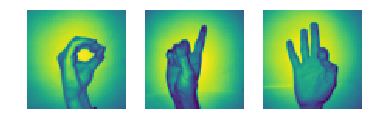

In [73]:
# 译者注：载入npy格式的数组文件，这是numpy存储数组的一种格式
# 如果是 kaggle 环境
x_l = np.load('input/Sign-language-digits-dataset/X.npy')
Y_l = np.load('input/Sign-language-digits-dataset/Y.npy')
# 如果是 github 下载的，
#x_l = np.load('input/Sign-language-digits-dataset/X.npy')
# Y_l = np.load('input/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 3, 1)
# 译者注：大家可以通过改变x_l序号，看看不同手势符号
# 符号0图片
plt.imshow(x_l[205].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
# 符号1图片
plt.imshow(x_l[823].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
# 译者注：符号3图片，你还可以试试其他序号
plt.imshow(x_l[1].reshape(img_size, img_size))
plt.axis('off')

* 为了创建图像数组，我把0和1的数组连接到一起。
* 然后我为符号0图像数组创建了标签数组z，为符号1图像数组创建了标签数组o
* 译者注：不熟悉numpy的初学者，可以搜索”numpy.resharp 例子" 或者调用help(np.reshape)来看下它的用法 [python基础之numpy.reshape详解](https://www.jianshu.com/p/fc2fe026f002)

In [67]:
# Join a sequence of arrays along an row axis.
# 把一串数组的连接起来，统一编号
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # 从 0 到 204 是符号”0“ 从205到410是符号”1“
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
# 译者笔记：这里将z和o连接起来,然后变成一个410x1的数组
print(X.shape)
print(Y.shape)
# 去掉注释就可以阅读到np.reshape的帮助
# help(np.reshape)

(410, 64, 64)
(410, 1)


* X的形状是 (410, 64, 64)
    * 410表示我们有410张照片 (标志0和标志1的照片)
    * 64 表示我们照片的大小是64x64(64x64像素)
* Y的形状是(410,1)
    *  410 表示我们有410个标签(0和1组成) 
* 让我们把X,Y拆分成训练组和测试组
    * 参数 test_size = 测试大小的百分比. 测试占 15% 和 训练占 85% (译者注：原文这里标注成75%是计算错误。)
    * 参数 random_state = 42 我们使用相同的随机种子. 这意味着如果我们反复划分训练和测试组，他总是使用相同的训练和测试分布，因为我们使用相同的random_state参数值

In [64]:
# 让我们创建数组 x_train, y_train, x_test, y_test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train)
print(number_of_test)

348
62


* 现在我们有3维数组X 做为输入，但是我们要把降维到2维，才能把他变成我们第一个深度学习模型的输入
* 译者注：也就是通过numpy.reshape把64*64的二维数组变成4096的一维数组.
* 我们的标签数组(Y)已经是2维，所以我们不用动它。
* 让我们把X数组变平吧(图像数组).


In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* 如你所见, 我们的训练数组中有348张图像，每张图像有4096个像素。
* 同时, 我们的测试数组有62张图像，每张图像也有4096个像素。
* 然后，我们对矩阵做转置，也就是做行和列的交换。
* 我知道你会问为什么要做置换，这里没有什么技术上的解释。你看到我后面写得代码就明白了。：）
* 译者注：如果你和我一样已经把线性代数基本还给大学老师了，请看一下百度百科，非常简单https://baike.baidu.com/item/%E8%BD%AC%E7%BD%AE%E7%9F%A9%E9%98%B5）

In [74]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
到现在我们都做了什么:
* 为符号0和符号1创建了标签
* 创建了已经降维的训练和测试组
* 我们最终的输入(图像)和输出（标签和分类）看起来如图所示
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="3"></a> <br>
# 逻辑回归
* 当我们说到二元分类时（0和1的输出），我们就会立刻想到逻辑回归。
* 译者注：如果你和我一样看到回归两个字就很晕，可以看一下关于逻辑回归的解释。
（https://easyai.tech/ai-definition/logistic-regression/）
* 然而，在深度学习指南中，逻辑回归是指什么呢？
* 答案是逻辑回归是个非常简单的神经网络。
* 顺便说一嘴，神经网络和深度学习就是同一件东西。当我们讲到人工神经网络的时候，我会解释“deep”“深度”这个名词的具体含义。
* 为了能理解逻辑回归（简易深度学习），让我们先学习下计算图（computation graph）。 

<a id="4"></a> <br>
##  计算图
* 计算图是一个理解数学表达式的不错的方式。
* 它看起来像数序表达式的可视化展示。
* 比如说表达式 $$c = \sqrt{a^2 + b^2}$$
* 它的计算图如图所示. 如我们所见的，数学被用图形的方式表达出来
<a href="http://imgbb.com/"><img src="http://image.ibb.co/hWn6Lx/d.jpg" alt="d" border="0"></a>

* 让我们来看看逻辑回归的计算图吧。
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * 参数包括了 weight(权重)和 bias(偏置） 
    * Weights权重: 每个像素的系数
    * Bias偏置: 截距
    * z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias 
    * z = (w.t)x + b  => z 等于 (系数乘以像素的转置) + 偏置值    
    * 换一种方式来说 => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * 通过激活函数Sigmoid可以将z做为参数，获得在0和1之间返回值。你可以在计算图中看到 sigmoid 函数
* 为什么我们要使用sigmoid函数?
    * 它给出了概率性的结果
    * 它是可导的，我们可以在梯度下降算法用到它。(我们很快就会看到它)
* 让我们来举个例子吧：
    * 比方说我们发现 z=4, 然后我们将 z做为参数传递给 sigmoid 函数。结果y_head的取值大概是0.9。它表示分类的结果有90%的概率是1。
* 现在让我们开始吧，挨个仔细练习计算图的每个部分吧。

<a id="5"></a> <br>
## 参数初始化
* 从前面的数据准备阶段，你知道我们的输入是4096像素的图片数组。（图片保存在 x_train 中）
* 每个数组有自己对应的权重。
* 第一步是每个像素乘以自己的权重。
* 但是，问题是权重的初始值应该是多少呢？ 
    * 关于权重初始化的一些技术，我会在人工神经网络中解释。但是，这一次初始化权重是0.01 
    * 好的，权重是0.01，那么权重数组的形状是什么样的？如你对计算图所理解的那样，它是(4096,1)
    * 译者注：我们的训练集的形状是x train:  (4096, 348)
    * 并且初始偏置值是0.
* 让我们来写代码吧。为了能在人工智能网络(ANN)等标题中反复使用这些代码，我定义了一个方法(method).

In [83]:
# 简单的定义方法示例
# 译者注：如果你已经学会 python, 不用管他
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# 让我们初始化参数吧
# 我们需要一个4096维的数组作为我们这个初始化权重方法的参数，每一维对应着一个像素。
# 译者注：initialize_weights_and_bias函数接受dimension做为参数，比如 dimension=4096, 
# 然后通过 np.full 创建一个4096维的长度为1的数组，并且通通赋值为0.01
# 译者注：np.full 返回一个根据指定shape和type,并用fill_value填充的新数组。
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
#help(np.full)

In [81]:
w,b = initialize_weights_and_bias(4096)
# 译者注：我们来看看参数的形状吧
print(w.shape)
print(b)

(4096, 1)
0.0


<a id="6"></a> <br>
## 前向传播
* 每一步通过像素计算代价的过程都可以称为前向传播。
    * z = (w.T)x + b => 在这个等式中我们知道x是像素数组，我们知道w(权重)和b(偏置值)，所以我们就只要通过计算就能知道z的值 (T是transpose转置运算)
    * 然后，我们将z代入sigmoid函数中，它返回一个y_head值（可能性）。如果你的思路看到这里感到混乱，那么就再去看一眼计算图。sigmoid函数的公式已经在计算图中表示出来。
    * 然后我们运算损失loss(error)函数
    * 代价函数是所有损失的总和 
    * 让我们从z和编写sigmoid方法开始吧。我们把z作为输入参数，返回y_head值（可能性）。 

In [84]:
# 计算z值
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [85]:
y_head = sigmoid(0)
y_head

0.5

我们写了sigmoid方法，也试着用它计算了y_head值。让我们来学习下损失函数吧
* 译者注：参考 
[分类问题之损失函数](https://zh.wikipedia.org/wiki/%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C%E4%B9%8B%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8)
* 让我们来举个例子吧， 我把一张图片作为输入，然后把它乘以相应的权重然后加上偏置值，然后得到z。然后，我把z代入sigmoid方法中，这样我得到了 y_head值。直到这里为止，我们知道我们在做什么。然后，比方说，y_head变成了0.9, 比0.5大，所以我们预测图像是符号1.OK，每一件事情看来是好的。但是，我们的预测是正确的吗？我们怎么检查这是对是错嘛？答案是通过损失函数：
    * 损失函数的数学表达式如下
    <a href="https://imgbb.com/"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" alt="duzeltme" border="0"></a>
    * 它说你如果做了错误的预测，损失或者错误在变大。**DENKLEM DUZELTME**
        * 例子： 我们真实的图像是符号1并且它的标签也是1，然后我们的预测值 y_head=1。 当我们放入y和y_head放入损失公式，结果就是0.当我们做出正确预测时，我们的损失是0, 然而，如果我们做出的是错误的预测，比如 y_head=0,损失就是无穷大。
* 在这之后，代价函数是损失函数的总和。每个图片都有相应的损失函数。代价函数是这些图片的损失函数的总和。        
* 让我们来实现前向传播。


In [11]:
# 前向传播步骤:
# 计算 z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

<a id="7"></a> <br>
##  通过梯度下降优化算法
* 好的，现在我们知道我们的代价是错误 
* 因此，我们需要减少代价，因为我们知道如果成本高，它表示我们做出了错误的预测。 
* 让我们来想想第一步，一切都是从初始化权重和偏置值开始。因此代价依赖于他们。
* 为了降低代价，我们需要更新权重和偏置值。
* 换句话说, 我们的模型需要学习参数权重和偏置值，最小化代价函数。这项技术被称为梯度下降。
* 让我们举个例子:
    * 我们设置 w=5和 bias=0,所以现在忽略偏置值。然后，我们进行前向传播，我们的代价函数是1.5. 
    
    * 它看起来像这样 (红线)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="7" border="0"></a>
    * 如你所见在这幅图中， 我们当前的结果并不在代价函数的最低点。因此，我们需要达到代价最低点。好吧，让我们来更新权重。（符号:=表示为更新中） 
    * w := w - step. 问题是这里的距离(step)是什么意思？在当前，距离就是图中斜线slope1。好吧，这样的改变是显著的。为了找到最低点，我们使用斜率slope1.比如我们用 slope1 = 3，然后我们更新权重。w := w - slope1 => w = 2。
    * 现在我们的权重 w 是2，如你记得那样， 我们需要继续前向传播寻找最低代价值(cost)
    * 比如说根据前向传播，我们算出 w=2是，代价函数取值是0.4。我们这么做看起来是对的，因为代价函数取值变小了。我们得到了新的权重值，代价函数取值是0.4。这样够了吗？事实上我并不知道，所以我们再试一步。
    * Slope2 = 0.7 and w = 2. 让我们来更新权重 w : = w - step(slope2) => w = 1.3 权重现在是1.3. 让我们找出新的代价函数取值。
    * 再做了一次前向传播后， w=1.3 然后我们的代价 cost =0.3. 好吧，我们的代价变得更低， 它看起来不错。 但是它是不是足够好了呢或者我们是不是还要再执行一步呢？答案还是我不知道，让我们再试试。
    * Slope3 = 0.01 并且 w = 1.3. 更新权重 w := w - step(slope3) => w = 1.29 ~ 1.3. 这次权重并没有变化，因为我们找到了代价函数的最低点。 
    * 这一切看起来都不错，但是我们是怎么确定斜率的呢? 如果你还记得高中或者大学的课程，为了找到函数在某一指定点的斜率（代价函数的斜率），我们对这一点求导数. 也许你还会问，好吧我知道怎么求斜率了，但是怎么知道该往那边走呢？你会说也许顺着斜率，代价值也可能变大而不是走向最低点。我们的答案是斜率（导数）同时给出了距离和方向。因此不用担心。
    * 更新后的等式是这样的。他表示通过权重和偏置值计算得到的代价函数。根据权重和偏置值对代价函数求导，然后乘以α学习率，然后就可以更新权重值。（为了解释，我忽略了偏置值，但是所有的步骤都应该包含偏置值）
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>
    * 现在，我确定你会问什么是学习率，我前面从没有提到过。它是非常直白的术语，它决定了学习率。然后，这里有个学习很快或者不学习的权衡。比如说你在巴黎（当前的代价），然后你想去马德里（最小代价）。如果你的速度（学习率）很慢，你会花很长时间才能到达马德里。但是，另一方面，如果你的速度（学习率）非常大，你可以跑得飞快但是有可能坠毁而永远到不了马德里。因此，我们要明智地选择速度（学习率）
    * 学习率也称为超参，需要被选择和调校。我会在人工神经网络中一起更详细介绍它和其他超参。现在，我们假设在前面的例子中学习率为1
    
* 我想现在你已经理解了前向传播的逻辑了（从权重和偏置值到代价）和后向传播（从代价来更新权重和偏置值）。而且你也学习了梯度下降。在实现代码前，你还要学习另外一件事情：我们怎么根据权重和偏置值对代价函数求导。这和Python或者编程无关。这是纯数学。有两个观点，第一个是用 Google搜索关于怎么对log loss函数求导， 第二个是google搜索什么是log loss函数的导数。我选择第二种因为我不说话就无法解释数学 ：）

$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [12]:
# 在后序传播中，我们会使用前向传播得到的 y_head 
# 因此，我们把前向传播和后向传播绑在一起，而不是再写个后向传播的函数。
def forward_backward_propagation(w,b,x_train,y_train):
    # 前向传播
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # 后向传播
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

* 到这里，我们学习了：
    * 初始化参数 (已经实现)
    * 通过前向传播和代价函数寻找代价 (已经实现)
    * 更新（学习）参数（权重和偏置值）。让我们来实现它。


In [86]:
# 更新学习参数
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # 更新学习参数需要number_of_iterarion次迭代
    for i in range(number_of_iterarion):
        # 做前向和后向传播来寻找代价和梯度
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # 让我们来做更新
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # 我们更新了学习参数权重 weights 和偏置值 bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

* 哇, 我觉得累了 :) 到这里为止，我们已经学习了参数. 这表示我们适应了数据
* 为了预测，我们已经搞好了参数。那么，我们开始预测吧。
* 在预测步骤中，我们用测试集x_test做为输入。我们对它做前向预测。

In [87]:
 # 预测
def predict(w,b,x_test):
    # x_test 是前向传播的输入
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # 如果 z 大于 0.5, 我们的预测结果是符号1 (y_head=1),
    # 如果 z 小于 0.5,, 我们的预测结果是符号0 (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

* 我们做了预测。
* 现在让我们把所有工作串起来吧。

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


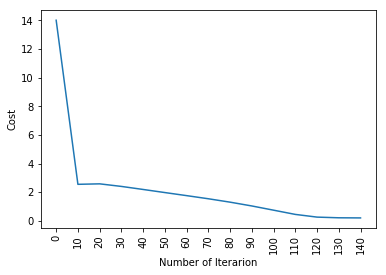

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [90]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # 初始化
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # 不要去改变学习率
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # 打印训练测试错误
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

* 我们学习了简易神经网络（逻辑回归）背后的逻辑和怎么实现它。
* 现在我们已经学习了逻辑，我们接下来可以用sklearn库了，用它来实现这些逻辑回归的步骤更加容易。




<a id="8"></a> <br>
## 通过 Skylearn 做逻辑回归
* 在sklearn库中, 有个逻辑回归方法可以很容易地实现逻辑回归。 
* 我不打算解释sklearn逻辑回归用到的每个参数，但是如果你想要的话，可以读这篇文章 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 但是，精确度和我们前面计算得到的是不一样的。因为逻辑回归函数还使用了其他很多我们没有在前面用到的特性，比如不同的优化参数和调整。
* 让我们对逻辑回归下个结论，然后开始人工智能网络部分吧。

In [89]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


<a id="9"></a> <br>
## 总结和问题
<font color='purple'>
在第一部分我们都做了什么:
* 初始化参数权重和偏置值
* 前向传播
* 损失函数
* 代价函数
* 后向传播 (梯度下降)
* 用学习到的参数权重和偏置值做预测
* 通过 Skylearn 进行逻辑回归

<br> 如果你在这里有问你可以问作者，因为接下来我们会构建逻辑回归的人工智能网络。
<br> 家庭作业: 这是一个不错的点，停下来做个联系吧. 你的作业是创建自己的逻辑回归方法来分类另外两个数字符号。

<a id="10"></a> <br>
# 人工神经网络 (ANN)
* 它也被称为深度神经网络或者深度学习
* **什么是神经网络:** 它是基本上是逻辑回归，并且执行两遍以上。
* 在逻辑回归中, 有输入层和输出层。然后，在神经网络中，在输入层和输出层之间至少还有一层隐藏的层
* **什么是深度, 多少层可以称为深度 ** 当我问我的老师这个问题的时候，他说“深度”（Deep)是个具有相对性的名词；它当然是指出了网络的深度，表明了有多少隐藏层。 “你的游泳池有多深？” 它可以是12英寸深（3.6米左右）也可以是2英寸（0.6米)。无论如何，它都有个深度。泳池的质量可以用深度来表示。32年前，我使用了两到三个隐藏层。那是因为那时我收到了专用硬件的限制。在几年前，20层被视为挺深了。在10月，吴恩达提到了152层是他目前知道的最大的商业网络。上周，我和在某著名大公司供职的人聊天，他说他用了几千层。所以，我倾向于坚持问“多深？”
* **为什么它称为“隐藏”:** 因为隐藏层看不到输入(训练集)。
* 比方说你有输入，1层隐藏层和输出层。当有人问你“嘿，我的朋友，你的神经网络有几层？”答案是“我有两层神经网络”。因为当计算层数时, 输入层被无视了。
* 让我们来看2层神经网络: 
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* 我们会一步步学习这张图.
    * 如你所见在输入和输出层之间有一层隐藏层。而这个隐藏层有3个节点。如果你好奇为啥我选择了3个节点，答案是没有理由，我就是这么选的。节点数量是和学习率一样是超参。因此我们会在神经网络部分结束的时候看到这些超参。
    * 输入和输出层没有变。他们和逻辑回归是一样的。
    * 在图中有一个tanh函数，你可能并不了解. 它和sigmoid函数一样是激活函数. Tanh激活函数用于隐藏单元时比sigmoid函数好，因为它的输出的平均值接近于0，所以它为下一层做了数据集中。而且，tanh激活函数增加了非线性，这让我们的学习模型更好。
    * 如你所见紫色的有两部分。每个部分都和逻辑回归那样。它们的区别是激活函数，输入和输出。
        * 在逻辑回归中: 输入 => 输出
        * 在两层神经网络中: 输入 => 隐藏层 => 输出层. 你可以认为隐藏层是第一部分的输出和第二部分的输入。
* 说完了. 我们将会沿着逻辑回归相同的路径来学习两层神经网络。

   
    
    

<a id="11"></a> <br>
## 2层神经网络
* 层的大小，权重以及偏置值参数初始化
* 前向传播
* 损失函数和代价函数
* 后向传播
* 更新参数
* 用学到的权重的偏置值做预测
* 创建模型

<a id="12"></a> <br>
## 层的大小，权重以及偏置值参数初始化
* 训练集x_train有348个样本 $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

* 在逻辑回归中, 我们初始化权重 0.01 和偏置值 0. 这次, 我们随机初始化权重。如果我们把第一隐藏层每个神经元都初始化为0将会进行同样的计算，即使多次梯度下降的迭代后，每个这一层的神经元仍然还是和其他神经元一样计算相同的事情。所以，我们做随机的初始化。而且，起始的权重会比较小。如果它们的初始值非常大，这会导致tanh函数的输入非常大，然而这会导致梯度接近于0.优化算法会非常慢。
* 偏置值开始时会是0

In [94]:
# 初始化参数和层大小
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
## 前向传播
* 前向传播和逻辑回归几乎一样。
* 唯一的区别是我们使用tanh函数和我们所有都做两次.
* numpy也有tanh函数. 所以我们不需要自己实现它。

In [18]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<a id="14"></a> <br>
## 损失函数和代价函数
* 损失函数和代价函数同逻辑回归是一样的
* Cross entropy function
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

In [95]:
# 计算代价
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="15"></a> <br>
## 后向传播
* 如你所知，后向传播需要求导。
* 如果你想进一步了解，（我需要用说来讲解），请看 youtube 视频
* 但是逻辑是一样的, 让我们来写代码吧。

In [96]:
# 后向传播
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
## 更新参数
* 更新参数和逻辑回归是一样的
* 我们其实和逻辑回归一样干了大量的工作。

In [97]:
# 更新参数
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="17"></a> <br>
## 用学到的权重和偏置值做预测
* 让我们写预测方法吧，它和逻辑回归的那个差不多

In [98]:
# 预测
def predict_NN(parameters,x_test):
    # x_test 是前向传播的输入
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # 如果z>0.5, 我们预测的结果是符号1
    # 如果z<0.5, 我们预测的结果是符号0,
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## 创建模型
* 让我们把所有东西放到一起

In [ ]:
# 两层神经网络
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #初始化参数和层大小
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # 前向传播
        A2, cache = forward_propagation_NN(x_train,parameters)
        # 计算开销
        cost = compute_cost_NN(A2, y_train, parameters)
         # 后向传播
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # 更新参数
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # 预测
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # 打印训练和测试的结果
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

<font color='purple'>

到这里为止，我们创建了两层神经网络，学习了如何实现。
* 层的大小，权重以及偏置值参数初始化
* 前向传播
* 损失函数和代价函数
* 后向传播
* 更新参数
* 用学到的权重的偏置值做预测
* 创建模型

<br> Now lets learn how to implement L layer neural network with keras.

<a id="19"></a> <br>
# L层神经网络
* **如果隐藏层数增加，会发生什么:** 早期的层会检测简单的特性。
* 如果后面的神经网络中，模型由简单的特性组成，模型可以学习更多更复杂的功能。比方说，让我们来看看符号1.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* 如果第一层学习了边缘或者基本图像比如说线条。当层数增加时，层开始学习更复杂的事情，比如凸多边形形状或者典型特征比如食指。
* 让我们来创建个模型
    * 有一些超参比如我们需要的学习率，迭代数，隐藏层数，隐藏单元数，激活函数的类型。哇，太多了，：）
    * 如果你花了大量时间在深度学习的世界，这些超参可以靠自觉挑选 
    * 但是, 如果你不想花太多时间，最后的办法还是 google 搜索，但是这也不是必须的。你需要尝试不同超参，找到最好的。
    * 在本指南中，我们的模型有2个隐藏层分别带了8个和4个节点。 因为隐藏层和节点数增加了，它会花大量的时间。
    * 对于激活函数，我们会分别用 relu(第一隐藏层)， relu(第二隐藏层)和 sigmoid(输出层)
    * 迭代将会是100次
* 我们的方法和前面一样，虽然你已经学过深度学习的逻辑，我们的工作还是可以通过keras库来简化。我们会为深度神经网络使用keras库。

* 首先让我们来转置训练集和测试集 x_train, x_test, y_train and y_test.

    
    

In [100]:
# 转置
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

<a id="22"></a> <br>
## 用keras库实现
让我们看看keras库的一些参数：
* units: 节点的输出维度
* kernel_initializer: 初始化权重
* activation: 激活函数, 我们用relu
* input_dim: 输入维度，这里它就是我们图象中的像素数量（4096像素）
* 优化器: 我们使用adam优化器
    * Adam是训练神经网络时最有效的的优化算法之一。
    * Adam的一些优点是相对小的内存需求，和常常只要少量调校超参就能工作得很好。
* 损失: 代价函数是相同的. 同时成本函数是我们前面用过的cross-entropy
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$
* metrics: 这是精确的
* cross_val_score: 使用交叉验证。如果你们不知道交叉验证，请看我的机器学习指南。
https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* epochs: 迭代数量

In [93]:
# 评估ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # 载入神经网络库
from keras.layers import Dense # 载入我们层库
def build_classifier():
    classifier = Sequential() # 载入神经网络
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
232/232 [==============================] - 0s 348us/step - loss: 0.6931 - accuracy: 0.5086
Epoch 2/100
232/232 [==============================] - 0s 55us/step - loss: 0.6929 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 56us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 54us/step - loss: 0.6926 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 53us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 54us/step - loss: 0.6923 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 51us/step - loss: 0.6922 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 54us/step - loss: 0.6921 - accuracy: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 56us/step - loss: 0.6920 - accuracy: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 52us/step - loss: 0.69

232/232 [==============================] - 0s 65us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 81/100
232/232 [==============================] - 0s 62us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 82/100
232/232 [==============================] - 0s 65us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 83/100
232/232 [==============================] - 0s 64us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 84/100
232/232 [==============================] - 0s 64us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 85/100
232/232 [==============================] - 0s 68us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 86/100
232/232 [==============================] - 0s 66us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 87/100
232/232 [==============================] - 0s 63us/step - loss: 0.6895 - accuracy: 0.5431
Epoch 88/100
232/232 [==============================] - 0s 62us/step - loss: 0.6896 - accuracy: 0.5431
Epoch 89/100
232/232 [==============================] - 0s 64us/step - loss: 0.6895 - 

232/232 [==============================] - 0s 64us/step - loss: 0.0635 - accuracy: 0.9828
Epoch 60/100
232/232 [==============================] - 0s 63us/step - loss: 0.0617 - accuracy: 0.9828
Epoch 61/100
232/232 [==============================] - 0s 63us/step - loss: 0.0591 - accuracy: 0.9828
Epoch 62/100
232/232 [==============================] - 0s 68us/step - loss: 0.0562 - accuracy: 0.9828
Epoch 63/100
232/232 [==============================] - 0s 64us/step - loss: 0.0546 - accuracy: 0.9828
Epoch 64/100
232/232 [==============================] - 0s 64us/step - loss: 0.0541 - accuracy: 0.9914
Epoch 65/100
232/232 [==============================] - 0s 68us/step - loss: 0.0594 - accuracy: 0.9871
Epoch 66/100
232/232 [==============================] - 0s 65us/step - loss: 0.0596 - accuracy: 0.9828
Epoch 67/100
232/232 [==============================] - 0s 62us/step - loss: 0.0493 - accuracy: 0.9871
Epoch 68/100
232/232 [==============================] - 0s 62us/step - loss: 0.0663 - 

232/232 [==============================] - 0s 66us/step - loss: 0.3652 - accuracy: 0.9655
Epoch 39/100
232/232 [==============================] - 0s 63us/step - loss: 0.3732 - accuracy: 0.9052
Epoch 40/100
232/232 [==============================] - 0s 62us/step - loss: 0.3732 - accuracy: 0.9310
Epoch 41/100
232/232 [==============================] - 0s 65us/step - loss: 0.3503 - accuracy: 0.9655
Epoch 42/100
232/232 [==============================] - 0s 60us/step - loss: 0.3504 - accuracy: 0.9310
Epoch 43/100
232/232 [==============================] - 0s 69us/step - loss: 0.3568 - accuracy: 0.9569
Epoch 44/100
232/232 [==============================] - 0s 63us/step - loss: 0.3348 - accuracy: 0.9397
Epoch 45/100
232/232 [==============================] - 0s 65us/step - loss: 0.3491 - accuracy: 0.9741
Epoch 46/100
232/232 [==============================] - 0s 61us/step - loss: 0.3577 - accuracy: 0.9052
Epoch 47/100
232/232 [==============================] - 0s 63us/step - loss: 0.3272 - 

<a id="23"></a> <br>
## Pytorch库中的人工神经网络.
* Pytorch和keras一样是一种框架。
* 它让创建和实现深度学习块更简单。
* 人工神经网络: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="24"></a> <br>
## Pytorch库中的卷积神经网络
* Pytorch和keras一样是一种框架。
* 它让创建和实现深度学习块更简单。 
* 卷积神经网络: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="25"></a> <br>
## Pytorch库中的循环神经网络
* Pytorch和keras一样是一种框架。
* 它让创建和实现深度学习块更简单。
* 循环神经网络RNN: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch

<a id="20"></a> <br>
# 结论
* 首先，感谢数据集的提供者
* 如果，你看到有错误拼写，请无视它们，谢谢 ：）
* 这篇指南是比较浅显的, 如果某些内容你需要更多细节可以评论.
* 如果你觉得我某些内容没有解释清楚，你可以到 youtube上面学习（特别是吴恩达），然后继续。
* 如果有些关于Python和机器学习的内容你理解不了，请看我其他的指南。
    * 数据科学: https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
    * 机器学习: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* 现在我希望你理解和学习什么是深度学习。然后，我们并不需要每次编写长长的代码来构建深度学习模型。因为有深度学习的框架可以简单快速地搭建学习模型。
    * 人工神经网络: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * 卷积神经网络: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * 循环神经网络: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
     

### <br>如果你喜欢他，请问作者点赞。
## <br> 如果你有任何问题，我非常高兴听到他。
